In [2]:
# KÜTÜPHANELERİN EKLENMESİ
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as spf 
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
!pip install xlrd
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
# EXCEL DOSYASININ OKUTULMASI
pd.set_option('display.max_columns', None) 
df = pd.read_excel(r"C:\Users\sosma\Desktop\sondurum.xlsx")
df.head()

,ogrid,VZ1,SPK1,RQ1,VZ2,SPK2,RQ2,VP,FNL
0,1,80.0,58.0,93,72.5,81.0,100.0,90,72.0
1,2,90.0,92.5,100,88.5,90.0,92.0,100,89.0
2,3,73.0,85.0,85,63.0,65.0,58.0,80,65.0
3,4,80.0,85.0,65,65.0,75.0,70.0,58,58.0
4,5,88.0,100.0,89,76.0,90.0,100.0,43,71.0


In [3]:
# EXCEL DOSYASININ OKUTULMASI
pd.set_option('display.max_columns', None) 
df = pd.read_excel(r"C:\Users\sosma\Desktop\sondurum.xlsx")
df.head()

,ogrid,VZ1,SPK1,RQ1,VZ2,SPK2,RQ2,VP,FNL
0,1,80.0,58.0,93,72.5,81.0,100.0,90,72.0
1,2,90.0,92.5,100,88.5,90.0,92.0,100,89.0
2,3,73.0,85.0,85,63.0,65.0,58.0,80,65.0
3,4,80.0,85.0,65,65.0,75.0,70.0,58,58.0
4,5,88.0,100.0,89,76.0,90.0,100.0,43,71.0


In [3]:
# EXCEL DOSYASININ OKUTULMASI
pd.set_option('display.max_columns', None) 
df = pd.read_excel(r"C:\Users\sosma\Desktop\sondurum.xlsx")
df.head()

,ogrid,VZ1,SPK1,RQ1,VZ2,SPK2,RQ2,VP,FNL
0,1,80.0,58.0,93,72.5,81.0,100.0,90,72.0
1,2,90.0,92.5,100,88.5,90.0,92.0,100,89.0
2,3,73.0,85.0,85,63.0,65.0,58.0,80,65.0
3,4,80.0,85.0,65,65.0,75.0,70.0,58,58.0
4,5,88.0,100.0,89,76.0,90.0,100.0,43,71.0


In [4]:
# SINAVLAR ARASI İLİŞKİNİN KORELASYON İLE ÖLÇÜLMESİ
df.drop(['ogrid'], axis=1)
df.corr()

,ogrid,VZ1,SPK1,RQ1,VZ2,SPK2,RQ2,VP,FNL
ogrid,1.000000,-0.072032,-0.001507,0.045720,-0.077853,-0.039494,0.008100,-0.016833,-0.079414
VZ1,-0.072032,1.000000,0.496618,0.230624,0.762830,0.483377,0.235453,0.093774,0.708561
SPK1,-0.001507,0.496618,1.000000,0.174484,0.448975,0.503361,0.140070,0.023095,0.457107
RQ1,0.045720,0.230624,0.174484,1.000000,0.250589,0.150359,0.289930,0.123020,0.208868
VZ2,-0.077853,0.762830,0.448975,0.250589,1.000000,0.551551,0.261643,0.196616,0.753610
SPK2,-0.039494,0.483377,0.503361,0.150359,0.551551,1.000000,0.114347,0.110087,0.518586
RQ2,0.008100,0.235453,0.140070,0.289930,0.261643,0.114347,1.000000,0.299445,0.249861
VP,-0.016833,0.093774,0.023095,0.123020,0.196616,0.110087,0.299445,1.000000,0.141933
FNL,-0.079414,0.708561,0.457107,0.208868,0.753610,0.518586,0.249861,0.141933,1.000000


In [5]:
# VZ1 SINAVI İLE BAĞLANTILI OLMAYAN SINAVLARIN VERİ SETİNDEN ÇIKARILMASI
df = df.drop(columns=['SPK1', 'RQ1','SPK2','RQ2','VP'])

In [6]:
df.head()

,ogrid,VZ1,VZ2,FNL
0,1,80.0,72.5,72.0
1,2,90.0,88.5,89.0
2,3,73.0,63.0,65.0
3,4,80.0,65.0,58.0
4,5,88.0,76.0,71.0


In [7]:
# TÜM ÖĞRENCİLERİN VİZE1 SINAVINDAN ALDIĞI TOPLAM NOT
df.VZ1.sum()


67809.0

In [8]:
df.VZ2.sum()

60505.0

In [9]:
df.FNL.sum()

61693.5

In [10]:
df.loc[df.VZ1 == 0 ]

,ogrid,VZ1,VZ2,FNL


In [11]:
df.loc[df.VZ2 == 0 ]
df.shape

(868, 4)

In [12]:
df.loc[df.FNL == 0 ]
df = df.drop([621,122])

In [13]:
df.head()

,ogrid,VZ1,VZ2,FNL
0,1,80.0,72.5,72.0
1,2,90.0,88.5,89.0
2,3,73.0,63.0,65.0
3,4,80.0,65.0,58.0
4,5,88.0,76.0,71.0


In [14]:



#df['bool2'] =  np.where((df['VZ1'] >= 40 ) &(df['VZ1'] <= 50 )  , True, False)

#dogru_sayisi1 = df[df.bool2 == True]

#print(dogru_sayisi1)

#count = df['bool2'].value_counts()
#print (count)

<AxesSubplot: xlabel='VZ1', ylabel='Count'>

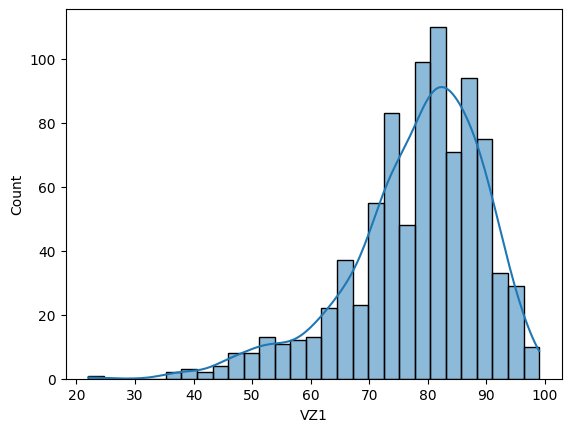

In [15]:
#VZ1 = 8.9278--------- 67.674    TOPLAM PUAN
#VZ2 = 10------------- 60.418    TOPLAM PUAN
#FNL = 9.7980 -------- 61.663.5  TOPLAM PUAN



sns.histplot(df["VZ1"], kde=True)



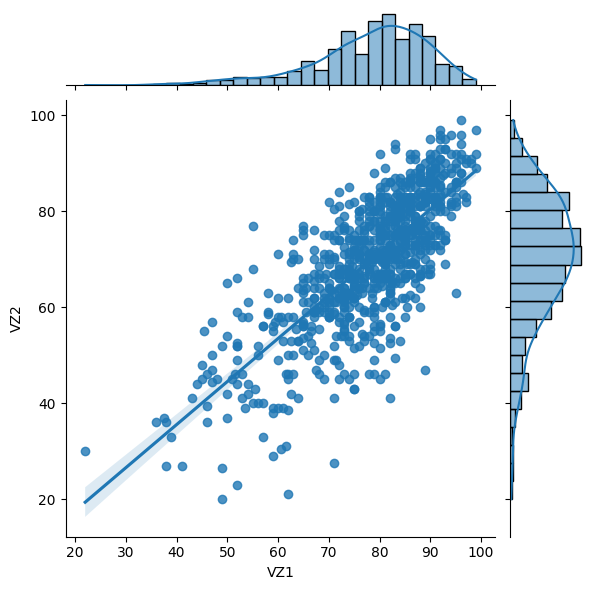

In [16]:
sns.jointplot(data=df, x="VZ1", y="VZ2", kind="reg" )


Text(0.5, 1.0, 'Regresyon Çizgisi')

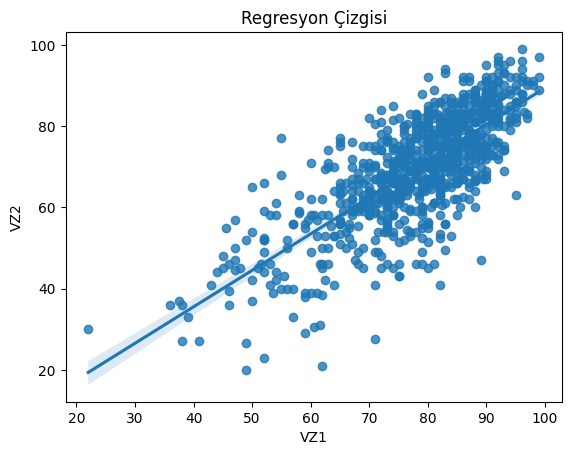

In [17]:
sns.regplot(x="VZ1", y="VZ2", data = df)
plt.title("Regresyon Çizgisi")

In [18]:
#vize1_liste = []
#vize2_liste = []

#for VZ1 in df['VZ1']:
    
#    vize1_liste.append(VZ1)
    
#for VZ2 in df['VZ2']:
    
#    vize2_liste.append(VZ2)
    


x = df.iloc[:,:-1]
y = df.iloc[:,-1]

#print(x)
#print(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

regressor= LinearRegression()

regressor.fit(x_train,y_train)


LinearRegression()

In [19]:
y_pred = regressor.predict(x_test)
#y_pred

In [20]:
df1 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred } )



df1 = df1.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })



df1['Tahmin_Not_55'] = df1[['Tahmin_Not']] -10

df1['Tahmin_Not_5'] = df1[['Tahmin_Not']] + 10

df1

df1['bool1'] =  np.where((df1['Gerçek_Not'] >= df1['Tahmin_Not_55']) &(df1['Gerçek_Not'] <= df1['Tahmin_Not_5'] ) & (df1['Gerçek_Not'] <= 80) & (df1['Gerçek_Not'] >= 60) & (df1['Tahmin_Not'] <= 80) , True, False)

dogru_sayisi1 = df1[df1.bool1 == True]

print(dogru_sayisi1)

count1 = df1['bool1'].value_counts()
print (count1)





     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
633        61.0   64.051986      54.051986     74.051986   True
77         73.0   75.936777      65.936777     85.936777   True
691        72.0   79.900821      69.900821     89.900821   True
254        65.0   61.880469      51.880469     71.880469   True
751        73.0   72.459458      62.459458     82.459458   True
..          ...         ...            ...           ...    ...
688        73.0   68.543942      58.543942     78.543942   True
128        69.0   68.942954      58.942954     78.942954   True
241        66.0   56.214679      46.214679     66.214679   True
808        62.0   54.809333      44.809333     64.809333   True
419        60.0   58.887590      48.887590     68.887590   True

[119 rows x 5 columns]
False    141
True     119
Name: bool1, dtype: int64


In [21]:
df1['bool2'] =  np.where((df1['Gerçek_Not'] == df1['Tahmin_Not'] )  , True, False)

dogru_sayisi2 = df1[df1.bool2 == False]

print(dogru_sayisi2)

     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1  bool2
379        66.0   79.815039      69.815039     89.815039  False  False
101        54.0   62.146474      52.146474     72.146474  False  False
633        61.0   64.051986      54.051986     74.051986   True  False
176        48.0   49.145864      39.145864     59.145864  False  False
77         73.0   75.936777      65.936777     85.936777   True  False
..          ...         ...            ...           ...    ...    ...
241        66.0   56.214679      46.214679     66.214679   True  False
808        62.0   54.809333      44.809333     64.809333   True  False
236        75.0   60.927351      50.927351     70.927351  False  False
419        60.0   58.887590      48.887590     68.887590   True  False
242        52.0   46.330974      36.330974     56.330974  False  False

[260 rows x 6 columns]


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

In [23]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

knn= KNeighborsRegressor()
knn.fit(x_train,y_train)

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)

en= ElasticNet()
en.fit(x_train,y_train)

random= RandomForestRegressor()
random.fit(x_train,y_train)

gd= GradientBoostingRegressor()
gd.fit(x_train,y_train)

svr= SVR()
svr.fit(x_train,y_train)

regressor= LinearRegression()

regressor.fit(x_train,y_train)

br= BayesianRidge()
br.fit(x_train,y_train)

kr= KernelRidge()
kr.fit(x_train,y_train)

xgb= XGBRegressor()
xgb.fit(x_train,y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [25]:
y_pred = dt.predict(x_test)

df2 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred } )

df2 = df2.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })

df2['Tahmin_Not_55'] = df2[['Tahmin_Not']] -10

df2['Tahmin_Not_5'] = df2[['Tahmin_Not']] + 10
df2

df2['bool1'] =  np.where((df2['Gerçek_Not'] >= df2['Tahmin_Not_55']) &(df2['Gerçek_Not'] <= df2['Tahmin_Not_5']) & (df2['Gerçek_Not'] <= 80) & (df2['Gerçek_Not'] >= 60) & (df2['Tahmin_Not'] <= 80) , True, False)

dogru_sayisi1 = df2[df2.bool1 == True]

print(dogru_sayisi1)

count1 = df2['bool1'].value_counts()
print (count1)



     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
379        66.0        74.0           64.0          84.0   True
633        61.0        64.0           54.0          74.0   True
77         73.0        77.0           67.0          87.0   True
691        72.0        74.0           64.0          84.0   True
320        67.0        75.0           65.0          85.0   True
..          ...         ...            ...           ...    ...
128        69.0        68.0           58.0          78.0   True
819        64.0        57.0           47.0          67.0   True
241        66.0        73.0           63.0          83.0   True
236        75.0        69.0           59.0          79.0   True
419        60.0        54.0           44.0          64.0   True

[106 rows x 5 columns]
False    154
True     106
Name: bool1, dtype: int64


In [26]:
y_pred = knn.predict(x_test)

df3 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred } )

df3 = df3.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })

df3['Tahmin_Not_55'] = df3[['Tahmin_Not']] -10

df3['Tahmin_Not_5'] = df3[['Tahmin_Not']] + 10

df3

df3['bool1'] =  np.where((df3['Gerçek_Not'] >= df3['Tahmin_Not_55']) &(df3['Gerçek_Not'] <= df3['Tahmin_Not_5']) & (df3['Gerçek_Not'] <= 80) & (df3['Gerçek_Not'] >= 60) & (df3['Tahmin_Not'] <= 80)  , True, False)

dogru_sayisi1 = df3[df3.bool1 == True]

print(dogru_sayisi1)

count1 = df3['bool1'].value_counts()
print (count1)


     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
633        61.0        68.4           58.4          78.4   True
77         73.0        76.0           66.0          86.0   True
691        72.0        73.8           63.8          83.8   True
478        66.0        74.0           64.0          84.0   True
254        65.0        66.8           56.8          76.8   True
..          ...         ...            ...           ...    ...
128        69.0        69.0           59.0          79.0   True
241        66.0        72.8           62.8          82.8   True
808        62.0        60.4           50.4          70.4   True
236        75.0        72.8           62.8          82.8   True
419        60.0        62.4           52.4          72.4   True

[125 rows x 5 columns]
False    135
True     125
Name: bool1, dtype: int64


In [27]:
y_pred = random.predict(x_test)

df4 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred } )

df4 = df4.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })

df4['Tahmin_Not_55'] = df4[['Tahmin_Not']] -10

df4['Tahmin_Not_5'] = df4[['Tahmin_Not']] + 10



df4['bool1'] =  np.where((df4['Gerçek_Not'] >= df4['Tahmin_Not_55']) &(df4['Gerçek_Not'] <= df4['Tahmin_Not_5'] ) & (df4['Gerçek_Not'] <= 80) & (df4['Gerçek_Not'] >= 60) & (df4['Tahmin_Not'] <= 80) , True, False)

dogru_sayisi1 = df4[df4.bool1 == True]

print(dogru_sayisi1)

count1 = df4['bool1'].value_counts()
print (count1)


     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
633        61.0      68.505         58.505        78.505   True
77         73.0      74.480         64.480        84.480   True
691        72.0      76.470         66.470        86.470   True
320        67.0      75.240         65.240        85.240   True
254        65.0      61.090         51.090        71.090   True
..          ...         ...            ...           ...    ...
128        69.0      65.810         55.810        75.810   True
819        64.0      71.280         61.280        81.280   True
241        66.0      59.050         49.050        69.050   True
236        75.0      66.570         56.570        76.570   True
419        60.0      55.060         45.060        65.060   True

[115 rows x 5 columns]
False    145
True     115
Name: bool1, dtype: int64


In [28]:
y_pred = gd.predict(x_test)

df5 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred } )

df5 = df5.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })

df5['Tahmin_Not_55'] = df5[['Tahmin_Not']] -10

df5['Tahmin_Not_5'] = df5[['Tahmin_Not']] + 10



df5['bool1'] =  np.where((df5['Gerçek_Not'] >= df5['Tahmin_Not_55']) &(df5['Gerçek_Not'] <= df5['Tahmin_Not_5'] ) & (df5['Gerçek_Not'] <= 80) & (df5['Gerçek_Not'] >= 60) & (df5['Tahmin_Not'] <= 80) , True, False)

dogru_sayisi1 = df5[df5.bool1 == True]

print(dogru_sayisi1)
count1 = df5['bool1'].value_counts()
print (count1)


     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
633        61.0   67.311500      57.311500     77.311500   True
77         73.0   74.775660      64.775660     84.775660   True
691        72.0   75.550413      65.550413     85.550413   True
478        66.0   75.556474      65.556474     85.556474   True
254        65.0   63.722140      53.722140     73.722140   True
..          ...         ...            ...           ...    ...
128        69.0   69.151109      59.151109     79.151109   True
241        66.0   60.445213      50.445213     70.445213   True
808        62.0   54.161303      44.161303     64.161303   True
236        75.0   71.325055      61.325055     81.325055   True
419        60.0   58.354654      48.354654     68.354654   True

[121 rows x 5 columns]
False    139
True     121
Name: bool1, dtype: int64


In [29]:
y_pred = svr.predict(x_test)

df200 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred } )

df200 = df200.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })

df200['Tahmin_Not_55'] = df200[['Tahmin_Not']] -10

df200['Tahmin_Not_5'] = df200[['Tahmin_Not']] + 10



df200['bool1'] =  np.where((df200['Gerçek_Not'] >= df200['Tahmin_Not_55']) &(df200['Gerçek_Not'] <= df200['Tahmin_Not_5'] ) & (df200['Gerçek_Not'] <= 80) & (df200['Gerçek_Not'] >= 60) & (df200['Tahmin_Not'] <= 80) , True, False)

dogru_sayisi1 = df200[df200.bool1 == True]

print(dogru_sayisi1)
count1 = df200['bool1'].value_counts()
print (count1)


     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
379        66.0   75.041935      65.041935     85.041935   True
633        61.0   70.880883      60.880883     80.880883   True
77         73.0   73.115861      63.115861     83.115861   True
691        72.0   71.967658      61.967658     81.967658   True
320        67.0   75.284212      65.284212     85.284212   True
..          ...         ...            ...           ...    ...
128        69.0   73.419306      63.419306     83.419306   True
819        64.0   72.364504      62.364504     82.364504   True
241        66.0   73.524641      63.524641     83.524641   True
808        62.0   71.035798      61.035798     81.035798   True
236        75.0   73.854756      63.854756     83.854756   True

[142 rows x 5 columns]
True     142
False    118
Name: bool1, dtype: int64


In [30]:
y_pred = en.predict(x_test)

df7 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred } )

df7 = df7.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })

df7['Tahmin_Not_55'] = df7[['Tahmin_Not']] -10

df7['Tahmin_Not_5'] = df7[['Tahmin_Not']] + 10



df7['bool1'] =  np.where((df7['Gerçek_Not'] >= df7['Tahmin_Not_55']) &(df7['Gerçek_Not'] <= df7['Tahmin_Not_5'] ) & (df7['Gerçek_Not'] <= 80) & (df7['Gerçek_Not'] >= 60) & (df7['Tahmin_Not'] <= 80) , True, False)

dogru_sayisi1 = df7[df7.bool1 == True]

print(dogru_sayisi1)

count1 = df7['bool1'].value_counts()
print (count1)


     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
633        61.0   64.082420      54.082420     74.082420   True
77         73.0   75.910855      65.910855     85.910855   True
691        72.0   79.846003      69.846003     89.846003   True
254        65.0   61.934729      51.934729     71.934729   True
751        73.0   72.442495      62.442495     82.442495   True
..          ...         ...            ...           ...    ...
688        73.0   68.544099      58.544099     78.544099   True
128        69.0   68.964259      58.964259     78.964259   True
241        66.0   56.310020      46.310020     66.310020   True
808        62.0   54.890645      44.890645     64.890645   True
419        60.0   58.962396      48.962396     68.962396   True

[120 rows x 5 columns]
False    140
True     120
Name: bool1, dtype: int64


In [31]:
y_pred = kr.predict(x_test)

df10 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred } )

df10 = df10.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })

df10['Tahmin_Not_55'] = df10[['Tahmin_Not']] -10

df10['Tahmin_Not_5'] = df10[['Tahmin_Not']] + 10



df10['bool1'] =  np.where((df10['Gerçek_Not'] >= df10['Tahmin_Not_55']) &(df10['Gerçek_Not'] <= df10['Tahmin_Not_5'] ) & (df10['Gerçek_Not'] <= 80) & (df10['Gerçek_Not'] >= 60) & (df10['Tahmin_Not'] <= 80)  , True, False)

dogru_sayisi1 = df10[df10.bool1 == True]

print(dogru_sayisi1)
count1 = df10['bool1'].value_counts()
print (count1)


     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
633        61.0   63.790895      53.790895     73.790895   True
77         73.0   76.052626      66.052626     86.052626   True
254        65.0   61.022641      51.022641     71.022641   True
751        73.0   72.758824      62.758824     82.758824   True
142        62.0   65.581095      55.581095     75.581095   True
..          ...         ...            ...           ...    ...
158        69.0   69.227372      59.227372     79.227372   True
688        73.0   68.775617      58.775617     78.775617   True
128        69.0   68.288258      58.288258     78.288258   True
808        62.0   53.980001      43.980001     63.980001   True
419        60.0   57.686910      47.686910     67.686910   True

[112 rows x 5 columns]
False    148
True     112
Name: bool1, dtype: int64


In [32]:
y_pred = xgb.predict(x_test)

df11 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred } )

df11 = df11.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })

df11['Tahmin_Not_55'] = df11[['Tahmin_Not']] -10

df11['Tahmin_Not_5'] = df11[['Tahmin_Not']] + 10



df11['bool1'] =  np.where((df11['Gerçek_Not'] >= df11['Tahmin_Not_55']) &(df11['Gerçek_Not'] <= df11['Tahmin_Not_5'])  & (df11['Gerçek_Not'] <= 80) & (df11['Gerçek_Not'] >= 60) & (df11['Tahmin_Not'] <= 80)   , True, False)

dogru_sayisi1 = df11[df11.bool1 == True]

print(dogru_sayisi1)

count1 = df11['bool1'].value_counts()
print (count1)


     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
633        61.0   67.237320      57.237320     77.237320   True
77         73.0   77.123878      67.123878     87.123878   True
691        72.0   74.282074      64.282074     84.282074   True
320        67.0   75.757370      65.757370     85.757370   True
478        66.0   74.962166      64.962166     84.962166   True
..          ...         ...            ...           ...    ...
819        64.0   68.918571      58.918571     78.918571   True
241        66.0   67.206253      57.206253     77.206253   True
808        62.0   54.741909      44.741909     64.741909   True
236        75.0   73.460541      63.460541     83.460541   True
419        60.0   64.940063      54.940063     74.940063   True

[113 rows x 5 columns]
False    147
True     113
Name: bool1, dtype: int64


In [33]:
y_pred = br.predict(x_test)

df9 = pd.DataFrame({'Gerçek_Not' : y_test ,'Tahmin_Not' :y_pred  } )

df9 = df9.astype({"Gerçek_Not":'float',
                "Tahmin_Not":'float'
                })

df9['Tahmin_Not_55'] = df9[['Tahmin_Not']] -10

df9['Tahmin_Not_5'] = df9[['Tahmin_Not']] + 10



#df9['bool1'] =  np.where(( df9['Tahmin_Not'] > 90 ) & (100 > df9['Tahmin_Not'] ) & (df9['Gerçek_Not'] > df9['Tahmin_Not_55']) &(df9['Gerçek_Not'] < df9['Tahmin_Not_5'] )  , True, False)

df9['bool1'] =  np.where((df9['Gerçek_Not'] >= df9['Tahmin_Not_55']) &(df9['Gerçek_Not'] <= df9['Tahmin_Not_5']) & (df9['Gerçek_Not'] <= 80) & (df9['Gerçek_Not'] >= 60) & (df9['Tahmin_Not'] <= 80) , True, False)

dogru_sayisi1 = df9[df9.bool1 == True]

print(dogru_sayisi1)

count1 = df9['bool1'].value_counts()
print (count1)


#df['bool2'] =  np.where((df['VZ1'] >= 91 ) &(df['VZ1'] <= 92 )  , True, False)

#dogru_sayisi2 = df[df.bool2 == True]

df9['kontrol'] = np.where((df9['Gerçek_Not'] <= 80) & (df9['Gerçek_Not'] >= 60) , True, False)
dogru_sayisi2 = df9[df9.kontrol == True]

print(dogru_sayisi2)

count2 = df9['kontrol'].value_counts()
print (count2)
#count = df['bool2'].value_counts()
#print (count)

#df.merge(df9)

#print(df)

# + - 12.5 için 100 doğru tahmin - 260 sonuc içinde %38,4615 doğru sonuc 75-100 arası alan öğrenciler için
# + - 12.5 için 120 doğru tahmin - 260 sonuc içinde %46,1538 doğru sonuc 50-75 arası alan öğrenciler için
# + - 12.5 için 8 doğru tahmin - 260 sonuc içinde %3,0769 doğru sonuc 25-50 arası alan öğrenciler için
# + - 12.5 için 0 doğru tahmin - 260 sonuc içinde %0 doğru sonuc 0-25 arası alan öğrenciler için
# Toplam %89.62 notları tutturmuştur.

# 4. Grup (75-100) için en fazla %91.94 tahmin edilebilir. p1= 8.9278 p2 = 10  yani 100 alan öğrenci için konuşmaktayız. 
# 3. Grup (50-75) için en fazla %91.33 tahmin edilebilir. p1= 8.9278 p2 = 10  yani 100 alan öğrenci için konuşmaktayız.
# 2. Grup (25-50) için en fazla %90.15 tahmin edilebilir. p1= 8.9278 p2 = 10  yani 100 alan öğrenci için konuşmaktayız.
# 1. Grup (0-25) için en fazla %89.4 tahmin edilebilir. p1= 8.9278 p2 = 10  yani 100 alan öğrenci için konuşmaktayız.

# Görüldüğü üzere 100 ' lük öğrencinin 0 -25 arası alma olasılığı düşük çıkmıştır. %89.4 




#90-100 arası %30  ( 3 kişi Doğru 7 Kişi yanlış)
#80-90 arası %50  (33 kişi doğru 66 kişi yanlış)

#70-80 arası %64,21 (61 kişi doğru 95 kişi yanlış)
#60-70 arası %47,05 (32 kişi doğru 68 kişi yanlış)

# VZ1 DEN 70 alan öğrenci 6.2496 ağırlığındadır. 6 lık kapıyı geçip 7 lik kapıya adaydır. 60-70 puan aralığı olan 7. kategoride değerlendirilir.

# VZ1 DEN 80 alan öğrenci 7.1424 ağırlığındadır. 7 lik kapıyı geçip 8 lik kapıya adaydır. 70-80 puan aralığı olan 8. kategoride değerlendirilir.

# 60 - 80 arası 93 kişi doğru - 163 kişi yanlış  total = 256 kişi ve %36,32 doğru sonuç tutturmuştur.



#50-60 arası %33,33 (10 kişi doğru 30 kişi yanlış)
#40-50 arası %33,33 (3 kişi doğru 8 kişi yanlış)
#30-40 arası %33,33 (1 kişi doğru 0 kişi yanlış)
#20-30 arası %33,33 (0 kişi doğru 1 kişi yanlış)
#10-20 arası %33,33 (0 kişi doğru 0 kişi yanlış)
#0-10 arası %33,33 (0 kişi doğru 0 kişi yanlış)

#En fazla toplam Doğru 93 kişi 101 yanlış % 56,60 toplam doğru sonucu vermiştir.
# 60 - 80 arası %58.49 (159 kişi 60 ile 80 arası not almış - 93 doğru war )

# 60 - 80 arası %58.49 (159 kişi 60 ile 80 arası not almış - 93 doğru war )

# %59.51 (%25.43)  - % 79.56 ( % 30.29) arasında %55,72 (+1 -1 oynama payı veriyor noktayı koyuyoruz.)

     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1
633        61.0   64.069184      54.069184     74.069184   True
77         73.0   75.930634      65.930634     85.930634   True
691        72.0   79.874140      69.874140     89.874140   True
254        65.0   61.905607      51.905607     71.905607   True
751        73.0   72.452560      62.452560     82.452560   True
..          ...         ...            ...           ...    ...
688        73.0   68.551103      58.551103     78.551103   True
128        69.0   68.949291      58.949291     78.949291   True
241        66.0   56.249650      46.249650     66.249650   True
808        62.0   54.846757      44.846757     64.846757   True
419        60.0   58.914636      48.914636     68.914636   True

[119 rows x 5 columns]
False    141
True     119
Name: bool1, dtype: int64
     Gerçek_Not  Tahmin_Not  Tahmin_Not_55  Tahmin_Not_5  bool1  kontrol
379        66.0   79.791692      69.791692     89.791692  False     True
633       

In [34]:


sonuc100 = 0.1818 + ((0.1818 * (((8.9278/10)-1)/10)) * 10)
sonuc90 = 0.1636 + ((0.1636 * (((8.9278/10)-1)/10)) * 9)
sonuc80 =    0.1454 + ((0.1454 * (((8.9278/10)-1)/10)) * 8)
sonuc70 = 0.1272 + ((0.1272 * (((8.9278/10)-1)/10)) * 7 )
sonuc60 = 0.109+ (( 0.109 * (((8.9278/10)-1)/10))*6)
sonuc50 = 0.0909+ (( 0.3333 * (((8.9278/10)-1)/10))*5)
#sonuc5 = 0.3333 + ((0.3333 * (((8.9278/10)-1)/10)) * 5)
sonuc40 = 0.0727 + ((0.2666 * (((8.9278/10)-1)/10)) * 4)
sonuc30 =    0.0545 + ((0.2 * (((8.9278/10)-1)/10)) * 3)
sonuc20 = 0.0363 + ((0.0363 * (((8.9278/10)-1)/10)) * 2 )
sonuc10 = 0.0181+ (( 0.0181 * (((8.9278/10)-1)/10))*1)



print(sonuc100)
print(sonuc90)
print(sonuc80)
print(sonuc70)
print(sonuc60)
print(sonuc50)
print(sonuc40)
print(sonuc30)
print(sonuc20)
print(sonuc10)


print(sonuc100 + sonuc90 + sonuc80 + sonuc70 + sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10)

print(sonuc90 + sonuc100)

0.162307404
0.14781292719999997
0.13292816959999998
0.1176531312
0.101987812
0.07303178699999999
0.061266059199999987
0.04806679999999999
0.0355215828
0.0179059318
0.8984816047999997
0.31012033119999993


In [35]:

sonuc90 = 0.2 + ((0.2 * (((8.0352/10)-1)/9)) * 9)
sonuc80 =    0.1777 + ((0.1777 * (((8.0352/10)-1)/9)) * 8)
sonuc70 = 0.1555 + ((0.1555 * (((8.0352/10)-1)/9)) * 7 )
sonuc60 = 0.1333+ (( 0.1333 * (((8.0352/10)-1)/9))*6)
sonuc50 = 0.1111+ (( 0.1111 * (((8.0352/10)-1)/9))*5)
sonuc40 = 0.0888 + ((0.0888 * (((8.0352/10)-1)/9)) * 4)
sonuc30 =    0.0666 + ((0.0666 * (((8.0352/10)-1)/9)) * 3)
sonuc20 = 0.0444 + ((0.0444 * (((8.0352/10)-1)/9)) * 2 )
sonuc10 = 0.0222+ (( 0.0222 * (((8.0352/10)-1)/9))*1)




print(sonuc90)
print(sonuc80)
print(sonuc70)
print(sonuc60)
print(sonuc50)
print(sonuc40)
print(sonuc30)
print(sonuc20)
print(sonuc10)

sonuc = sonuc90 + sonuc80 + sonuc70 + sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 

sonuc2 = sonuc90 + sonuc80 
print(sonuc)
print(sonuc2)

0.160704
0.14666489244444444
0.13173683555555554
0.11583947733333333
0.09897281777777778
0.08104558933333333
0.06223814400000001
0.04246139733333334
0.021715349333333335
0.861378503111111
0.30736889244444443


In [36]:

sonuc80 = 0.22 + ((0.22 * (((7.1424/10)-1)/8)) * 8 )
sonuc70 = 0.1944+ (( 0.1944 * (((7.1424/10)-1)/8))*7)
sonuc60 = 0.1666+ (( 0.1666 * (((7.1424/10)-1)/8))*6)


sonuc50 = 0.1388 + ((0.1388 * (((7.1424/10)-1)/8)) * 5)
sonuc40 =    0.1111 + ((0.1111 * (((7.1424/10)-1)/8)) * 4)
sonuc30 = 0.0833 + ((0.0833 * (((7.1424/10)-1)/8)) * 3 )
sonuc20 = 0.0555+ (( 0.0555 * (((7.1424/10)-1)/8))*2)
sonuc10 = 0.0277+ (( 0.0277 * (((7.1424/10)-1)/8))*1)

sonuc55 = sonuc80 + sonuc70 + sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 

sonuc56 = sonuc80 + sonuc70 

sonuc57 = sonuc80 

print(sonuc80) 
print(sonuc70) 
print(sonuc60) 
print(sonuc50) 
print(sonuc40) 
print(sonuc30) 
print(sonuc20) 
print(sonuc10)


print(sonuc55) 

print(sonuc56) 

print(sonuc57) 

0.15713280000000002
0.145792224
0.130894288
0.11401032
0.095226032
0.074373572
0.05153508
0.026710556
0.7956748720000001
0.302925024
0.15713280000000002


In [37]:
sonuc70 = 0.25+ (( 0.25 * (((6.2496/10)-1)/7))*7)
sonuc60 = 0.2142+ (( 0.2142 * (((6.2496/10)-1)/7))*6)


sonuc50 = 0.1785 + ((0.1785 * (((6.2496/10)-1)/7)) * 5)
sonuc40 =    0.1428 + ((0.1428 * (((6.2496/10)-1)/7)) * 4)
sonuc30 = 0.1071 + ((0.1071 * (((6.2496/10)-1)/7)) * 3 )
sonuc20 = 0.0714+ (( 0.0714 * (((6.2496/10)-1)/7))*2)
sonuc10 = 0.0357+ (( 0.0357 * (((6.2496/10)-1)/7))*1)

sonuc55 =  sonuc70 + sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 

sonuc56 = sonuc70 + sonuc60 

print(sonuc70) 
print(sonuc60) 
print(sonuc50) 
print(sonuc40) 
print(sonuc30) 
print(sonuc20) 
print(sonuc10)


print(sonuc55) 
print(sonuc56) 

0.15624
0.145342656
0.13068239999999998
0.112196736
0.089885664
0.063749184
0.033787296
0.7318839359999999
0.301582656


In [38]:
# 555555555555 --------6666666666666666
sonuc60 = 0.2857+ (( 0.2857 * (((5.3568/10)-1)/6))*6)


sonuc50 = 0.238 + ((0.238 * (((5.3568/10)-1)/6)) * 5)
sonuc40 =    0.1904 + ((0.1904 * (((5.3568/10)-1)/6)) * 4)
sonuc30 = 0.1428 + ((0.1428 * (((5.3568/10)-1)/6)) * 3 )
sonuc20 = 0.0952+ (( 0.0952 * (((5.3568/10)-1)/6))*2)
sonuc10 = 0.0476+ (( 0.0476 * (((5.3568/10)-1)/6))*1)

sonuc55 =   sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 

sonuc56 = sonuc60 + sonuc50

print(sonuc60) 
print(sonuc50) 
print(sonuc40) 
print(sonuc30) 
print(sonuc20) 
print(sonuc10)


print(sonuc55) 
print(sonuc56) 


0.153043776
0.14590986666666667
0.13146231466666666
0.10964755200000001
0.08046557866666668
0.04391639466666667
0.6644454826666667
0.2989536426666667


In [39]:

sonuc50 = 0.3333 + ((0.3333 * (((4.464/10)-1)/5)) * 5)
sonuc40 =    0.2666 + ((0.2666 * (((4.464/10)-1)/5)) * 4)
sonuc30 = 0.2 + ((0.2 * (((4.464/10)-1)/5)) * 3 )
sonuc20 = 0.1333+ (( 0.1333 * (((4.464/10)-1)/5))*2)
sonuc10 = 0.0666+ (( 0.0666 * (((4.464/10)-1)/5))*1)
sonuc55 =    sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 

sonuc56=  sonuc50 + sonuc40
 

print(sonuc50) 
print(sonuc40) 
print(sonuc30) 
print(sonuc20) 
print(sonuc10)

print(sonuc55)
print(sonuc56)

0.14878512
0.148528192
0.13356800000000002
0.103782048
0.059226048
0.593889408
0.297313312


In [40]:
df20 =  pd.read_excel(r"C:\Users\sosma\Desktop\genelolasilik.xlsx")
df20.head()
df20


pd.set_option('display.max_columns', None) 

df21 =  pd.read_excel(r"C:\Users\sosma\Desktop\kategoripuan.xlsx")
df21.head()
df21

,grupid,upper,lower
0,10,100.00,87.50
1,9,89.99,77.14
2,8,79.99,66.66
3,7,70.00,56.00
4,6,60.00,45.00
5,5,49.99,33.33
6,4,40.00,20.00
7,3,30.00,0.00
8,2,20.00,0.00
9,1,10.00,0.00


In [41]:
#A: Başarı olasılığı
#B: Ters orantılı düşüş olasılığı
#C: Ters orantılı yükseliş olasılığı
#P1: Öğrencinin ilk eğitimden sonra kazandığı varsayılan yükü  = 4
#P2: Öğrencinin bir sonraki adımda karşılaştığı sınavın yükü = 6
#k: Kaçıncı geçişten geçiyor. = 10
#n: Seçilen öğrencinin grubu = 10 


#1.Durum: Karşılaşılan yük, sahip olunan yüke eşitse: 
#A = k/(n*(n+1)/2) ;   A= 10/((10*11)/2) = 10/55 = 0.1818

#2.Durum: Ters Orantı Düşüş Formülü (Büyükse):
#B= A + A * ((p1/p2 - 1) / n ) * k ;
#B= 0.1818+ 0.1818*((4/6 - 1) / 10) *10 = 0.1818-0.06 = 0.1218

#3.Durum: Ters Orantı Yükseliş Formülü (Küçükse):
#C= A + A * ((p1/p2 - 1) / n ) * (n-k+1); 
#C = 0.1818+ 0.1818*((6/4 - 1) / 10)*(10-10+1)
#C =  0.1818 + 0.1818*(1/20) = 0.1818 + 0.00909 = 0.1908

In [42]:
sonuc44 = 0.4 + ((0.4 * (((3.5712/10)-1)/4)) * 4)
sonuc43 = 0.3 + ((0.3 * (((3.5712/10)-1)/4)) * 3)
sonuc42 = 0.2 + ((0.2 * (((3.5712/10)-1)/4)) * 2)
sonuc41 = 0.1 + ((0.1 * (((3.5712/10)-1)/4)) * 1)



print(sonuc44)
print(sonuc43)
print(sonuc42)
print(sonuc41)


print(sonuc44 + sonuc43 )

0.14284800000000003
0.155352
0.135712
0.083928
0.2982


In [43]:
sonuc33 = 0.5 + ((0.5 * (((2.6783/10)-1)/3)) * 3)
sonuc32 = 0.33 + ((0.33 * (((2.6783/10)-1)/3)) * 2)
sonuc31 = 0.1666 + ((0.1666 * (((2.6783/10)-1)/3)) * 1)


print(sonuc33)
print(sonuc32)
print(sonuc31)

0.133915
0.1689226
0.12594015933333333


In [44]:
sonuc22 = 0.66 + ((0.66 * (((1.7855/10)-1)/2)) * 2)
sonuc21 = 0.33 + ((0.33 * (((1.7855/10)-1)/2)) * 1)



print(sonuc22)
print(sonuc21)


0.11784300000000003
0.19446075000000002


In [45]:
sonuc11 = 1 + ((1 * (((0.8927/10)-1)/1)) * 1)

print(sonuc11)

0.08926999999999996


In [46]:
# HATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
# HATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
# HATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
# HATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [47]:
#B= A + A * ((p1/p2 - 1) / n ) * k ;
sonuc55 = 0.3333 + ((0.3333 * (((4.4639/5)-1)/5)) * 5)
sonuc54 = 0.2666 + ((0.2666 * (((8.9278/10)-1)/5)) * 4)
sonuc53 = 0.2 + ((0.2 * (((8.9278/10)-1)/5)) * 3)
sonuc52 = 0.1333 + ((0.1333 * (((8.9278/10)-1)/5)) * 2 )
sonuc51 = 0.0666+ (( 0.0666 * (((8.9278/10)-1)/5))*1)

                                  
print(sonuc55)
print(sonuc54)
print(sonuc53)
print(sonuc52)
print(sonuc51)


print(sonuc55 + sonuc54  + sonuc53  + sonuc52 + sonuc51  )

0.29756357399999994
0.24373211839999998
0.1871336
0.1275830296
0.06517182960000001
0.9211841515999999


In [48]:
# k/(n*(n+1)/2)



In [49]:
sonuc44 = 0.4 + ((0.4 * (((8.9278/10)-1)/4)) * 4)
sonuc43 = 0.3 + ((0.3 * (((8.9278/10)-1)/4)) * 3)
sonuc42 = 0.2 + ((0.2 * (((8.9278/10)-1)/4)) * 2)
sonuc41 = 0.1 + ((0.1 * (((8.9278/10)-1)/4)) * 1)



print(sonuc44)
print(sonuc43)
print(sonuc42)
print(sonuc41)

print(sonuc44 + sonuc43 + sonuc42 + sonuc41)

0.357112
0.27587549999999994
0.189278
0.0973195
0.9195849999999999


In [50]:
sonuc33 = 0.5 + ((0.5 * (((8.9278/10)-1)/3)) * 3)
sonuc32 = 0.3333 + ((0.3333 * (((8.9278/10)-1)/3)) * 2)
sonuc31 = 0.1666 + ((0.1666 * (((8.9278/10)-1)/3)) * 1)




print(sonuc33)
print(sonuc32)
print(sonuc31)


print("Toplam Ulaşılabilecek Tahmini Olasılık:" ,sonuc33 + sonuc32 + sonuc31)

0.44638999999999995
0.30947571599999996
0.160645716
Toplam Ulaşılabilecek Tahmini Olasılık: 0.916511432


In [51]:
sonuc22 = 0.66 + ((0.66 * (((8.9278/10)-1)/2)) * 2)
sonuc21 = 0.33 + ((0.33 * (((8.9278/10)-1)/2)) * 1)




print(sonuc22)
print(sonuc21)

0.5892348
0.3123087


In [52]:
sonuc21 = 1 + ((1 * (((8.9278/10)-1)/1)) * 1)

print(sonuc21)

0.8927799999999999


In [53]:
sonuc100 = 0.1818 + ((0.1818 * (((8.8387/10)-1)/10)) * 10)
sonuc90 = 0.1636 + ((0.1636 * (((8.8387/10)-1)/10)) * 9)
sonuc80 =    0.1454 + ((0.1454 * (((8.8387/10)-1)/10)) * 8)
sonuc70 = 0.1272 + ((0.1272 * (((8.8387/10)-1)/10)) * 7 )
sonuc60 = 0.109+ (( 0.109 * (((8.8387/10)-1)/10))*6)
sonuc50 = 0.0909+ (( 0.3333 * (((8.8387/10)-1)/10))*5)
#sonuc5 = 0.3333 + ((0.3333 * (((8.8387/10)-1)/10)) * 5)
sonuc40 = 0.0727 + ((0.2666 * (((8.8387/10)-1)/10)) * 4)
sonuc30 =    0.0545 + ((0.2 * (((8.8387/10)-1)/10)) * 3)
sonuc20 = 0.0363 + ((0.0363 * (((8.8387/10)-1)/10)) * 2 )
sonuc10 = 0.0181+ (( 0.0181 * (((8.8387/10)-1)/10))*1)



print(sonuc100)
print(sonuc90)
print(sonuc80)
print(sonuc70)
print(sonuc60)
print(sonuc50)
print(sonuc40)
print(sonuc30)
print(sonuc20)
print(sonuc10)


print(sonuc100 + sonuc90 + sonuc80 + sonuc70 + sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10)


0.16068756599999998
0.1465010188
0.1318917584
0.1168597848
0.101405098
0.07154693549999999
0.06031589679999999
0.0475322
0.0354568962
0.0178898047
0.8900869592000001


In [54]:

sonuc90 = 0.2 + ((0.2 * (((8.9278/10)-1)/10)) * 9)
sonuc80 =    0.1777 + ((0.1777 * (((8.9278/10)-1)/10)) * 8)
sonuc70 = 0.1555 + ((0.1555 * (((8.9278/10)-1)/10)) * 7 )
sonuc60 = 0.1333+ (( 0.1333 * (((8.9278/10)-1)/10))*6)
sonuc50 = 0.1111+ (( 0.1111 * (((8.9278/10)-1)/10))*5)
sonuc40 = 0.0888 + ((0.0888 * (((8.9278/10)-1)/10)) * 4)
sonuc30 =    0.0666 + ((0.0666 * (((8.9278/10)-1)/10)) * 3)
sonuc20 = 0.0444 + ((0.0444 * (((8.9278/10)-1)/10)) * 2 )
sonuc10 = 0.0222+ (( 0.0222 * (((8.9278/10)-1)/10))*1)




print(sonuc90)
print(sonuc80)
print(sonuc70)
print(sonuc60)
print(sonuc50)
print(sonuc40)
print(sonuc30)
print(sonuc20)
print(sonuc10)

sonuc = sonuc90 + sonuc80 + sonuc70 + sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 

print(sonuc)

0.18070039999999998
0.1624576048
0.14382910299999999
0.1247245444
0.105143929
0.0849915456
0.0644577444
0.0434478864
0.0219619716
0.9317147292


In [55]:
sonuc5 = 0.3333 + ((0.3333 * (((8.9278/10)-1)/10)) * 5)

print(sonuc5)

0.31543178699999996


In [56]:
# k/(n*(n+1)/2)

n= 6 

sonuc =1 / (n*(n+1)/2)
print(sonuc)

0.047619047619047616


In [57]:

sonuc80 = 0.22 + ((0.22 * (((7.1424/10)-1)/8)) * 8 )
sonuc70 = 0.1944+ (( 0.1944 * (((7.1424/10)-1)/8))*7)
sonuc60 = 0.1666+ (( 0.1666 * (((7.1424/10)-1)/8))*6)


sonuc50 = 0.1388 + ((0.1388 * (((7.1424/10)-1)/8)) * 5)
sonuc40 =    0.1111 + ((0.1111 * (((7.1424/10)-1)/8)) * 4)
sonuc30 = 0.0833 + ((0.0833 * (((7.1424/10)-1)/8)) * 3 )
sonuc20 = 0.0555+ (( 0.0555 * (((7.1424/10)-1)/8))*2)
sonuc10 = 0.0277+ (( 0.0277 * (((7.1424/10)-1)/8))*1)

sonuc55 = sonuc80 + sonuc70 + sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 

print(sonuc80) 
print(sonuc70) 
print(sonuc60) 
print(sonuc50) 
print(sonuc40) 
print(sonuc30) 
print(sonuc20) 
print(sonuc10)


print(sonuc55) 






0.15713280000000002
0.145792224
0.130894288
0.11401032
0.095226032
0.074373572
0.05153508
0.026710556
0.7956748720000001


In [58]:
sonuc70 = 0.1944+ (( 0.1944 * (((6.2496/10)-1)/8))*7)
sonuc60 = 0.1666+ (( 0.1666 * (((6.2496/10)-1)/8))*6)


sonuc50 = 0.1388 + ((0.1388 * (((6.2496/10)-1)/8)) * 5)
sonuc40 =    0.1111 + ((0.1111 * (((6.2496/10)-1)/8)) * 4)
sonuc30 = 0.0833 + ((0.0833 * (((6.2496/10)-1)/8)) * 3 )
sonuc20 = 0.0555+ (( 0.0555 * (((6.2496/10)-1)/8))*2)
sonuc10 = 0.0277+ (( 0.0277 * (((6.2496/10)-1)/8))*1)

sonuc55 =  sonuc70 + sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 


print(sonuc70) 
print(sonuc60) 
print(sonuc50) 
print(sonuc40) 
print(sonuc30) 
print(sonuc20) 
print(sonuc10)


print(sonuc55) 

0.130605696
0.11973875199999999
0.10626528
0.090266528
0.071584688
0.05029632
0.026401424
0.5951586879999999


In [59]:


sonuc60 = 0.1666+ (( 0.1666 * (((6.2496/10)-1)/8))*6)


sonuc50 = 0.1388 + ((0.1388 * (((6.2496/10)-1)/8)) * 5)
sonuc40 =    0.1111 + ((0.1111 * (((6.2496/10)-1)/8)) * 4)
sonuc30 = 0.0833 + ((0.0833 * (((6.2496/10)-1)/8)) * 3 )
sonuc20 = 0.0555+ (( 0.0555 * (((6.2496/10)-1)/8))*2)
sonuc10 = 0.0277+ (( 0.0277 * (((8.9278/10)-1)/8))*1)

sonuc55 =   sonuc60 + sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 

 

print(sonuc60) 
print(sonuc50) 
print(sonuc40) 
print(sonuc30) 
print(sonuc20) 
print(sonuc10)


print(sonuc55) 

0.11973875199999999
0.10626528
0.090266528
0.071584688
0.05029632
0.02732875075
0.46548031875


In [60]:




sonuc50 = 0.1388 + ((0.1388 * (((8.9278/10)-1)/8)) * 5)
sonuc40 =    0.1111 + ((0.1111 * (((8.9278/10)-1)/8)) * 4)
sonuc30 = 0.0833 + ((0.0833 * (((8.9278/10)-1)/8)) * 3 )
sonuc20 = 0.0555+ (( 0.0555 * (((8.9278/10)-1)/8))*2)
sonuc10 = 0.0277+ (( 0.0277 * (((8.9278/10)-1)/8))*1)
sonuc55 =    sonuc50 + sonuc40 + sonuc30 + sonuc20 + sonuc10 

 

print(sonuc50) 
print(sonuc40) 
print(sonuc30) 
print(sonuc20) 
print(sonuc10)

print(sonuc55)

0.129498665
0.105143929
0.07995071525
0.0540123225
0.02732875075
0.3959343825


In [61]:


sonuc40 =    0.4 + ((0.4 * (((4.4639 /10)-1)/4)) * 4)
sonuc30 = 0.3 + ((0.3 * (((4.4639 /10)-1)/4)) * 3 )
sonuc20 = 0.2+ (( 0.2 * (((4.4639 /10)-1)/4))*2)
sonuc10 = 0.1+ (( 0.1 * (((4.4639 /10)-1)/4))*1)


sonuc55 =    sonuc40 + sonuc30 + sonuc20 + sonuc10 


print(sonuc40) 
print(sonuc30) 
print(sonuc20) 
print(sonuc10)


print(sonuc55)

0.178556
0.17543774999999998
0.14463900000000002
0.08615975000000001
0.5847925
